# Climate DT historical runs: ECmean4 within the AQUA framework 

We need to load the AQUA module to access the Reader and the ECmean `performance_indices` function. 
Configuration files (which tells ECmean4 where output should be written and the mask are) as well as interface file (which defines the Climate DT filename communication between AQUA and ECmean4) should be loaded.

We will run the ECmean code on both IFS-NEMO and ICON `historical-1990` experiment, for which we can get a serious assessment of the model skill. It will run on a reduced time window (5-year) to keep computation time slow. 

In [ ]:
import os
from aqua import Reader
from aqua.core.util import load_yaml, ConfigPath
from aqua.diagnostics.ecmean import performance_indices

models = ['IFS-NEMO', 'ICON']
exp = 'historical-1990'
year1 = 1996
year2 = 2000
numproc = 1


Configuration is currently done building on some AQUA internal function. This will be soon integrated into a ECmean class to be used inside AQUA. For now, we need to load the interface and ecmean configuration file from the `$AQUA/diagnostics/ecmean` folder. Output has to be manually adjusted, in this configuration we are providing lumi or levante defaults

In [ ]:

datadir = {'lumi': '/pfs/lustrep3/projappl/project_465000454/padavini/ecmean_new/output/PDF', 'levante': '/work/bb1153/b382076/ecmean_new/output/PDF'}
Configurer = ConfigPath()
machine = Configurer.machine
ecmeandir = os.path.join(Configurer.configdir, 'diagnostics', 'ecmean')
interface = os.path.join(ecmeandir, 'interface_AQUA_climatedt.yaml')
config = os.path.join(ecmeandir, 'ecmean_config_climatedt.yaml')
config = load_yaml(config)
config['dirs']['exp'] = ecmeandir

Now you can load the LRA (Low Resolution Archive) data looping on the two models and running the performance indices. The operation should take about less than 1 minute. Parallel processing can be used (not with dask rather with multiproc)

In [2]:
for model in models: 
    reader = Reader(model=model, exp=exp, source="lra-r100-monthly", fix=False)
    data = reader.retrieve()
    performance_indices(exp, year1, year2, numproc = numproc, config = config, model = model, 
            interface = interface, loglevel = 'info', xdataset = data)

2024-12-18 12:41:14 :: ConfigPath :: ERROR    -> In catalog ci when looking for IFS-NEMO_historical-1990_lra-r100-monthly triplet I could not find the model. Available alternatives are ['FESOM', 'IFS', 'ICON', 'NEMO', 'ERA5']


KeyError: 'Cannot find the triplet in any catalog. Check logger error for hints on possible typos'

Plots are PDF and ca be visualized browsing to the proper location where are they are been stored according to the configuration file
- [ICON](/users/padavini/work/ecmean_new/output/PDF/PI4_EC23_historical-1990_ICON_r1i1p1f1_1996_2000.pdf)
- [IFS-NEMO](/users/padavini/work/ecmean_new/output/PDF/PI4_EC23_historical-1990_IFS-NEMO_r1i1p1f1_1996_2000.pdf)

Otherwise, to visualize the output within the notebook we need to use an extra package, which is Wand. Remember to install it through `mamba install imagemagick` and `pip install wand` if you want to visualize the output.

In [8]:
from wand.image import Image as WImage
img_icon = WImage(filename=f'{datadir[machine]}/PI4_EC23_{exp}_ICON_r1i1p1f1_{year1}_{year2}.pdf')
img_ifs = WImage(filename=f'{datadir[machine]}/PI4_EC23_{exp}_IFS-NEMO_r1i1p1f1_{year1}_{year2}.pdf')

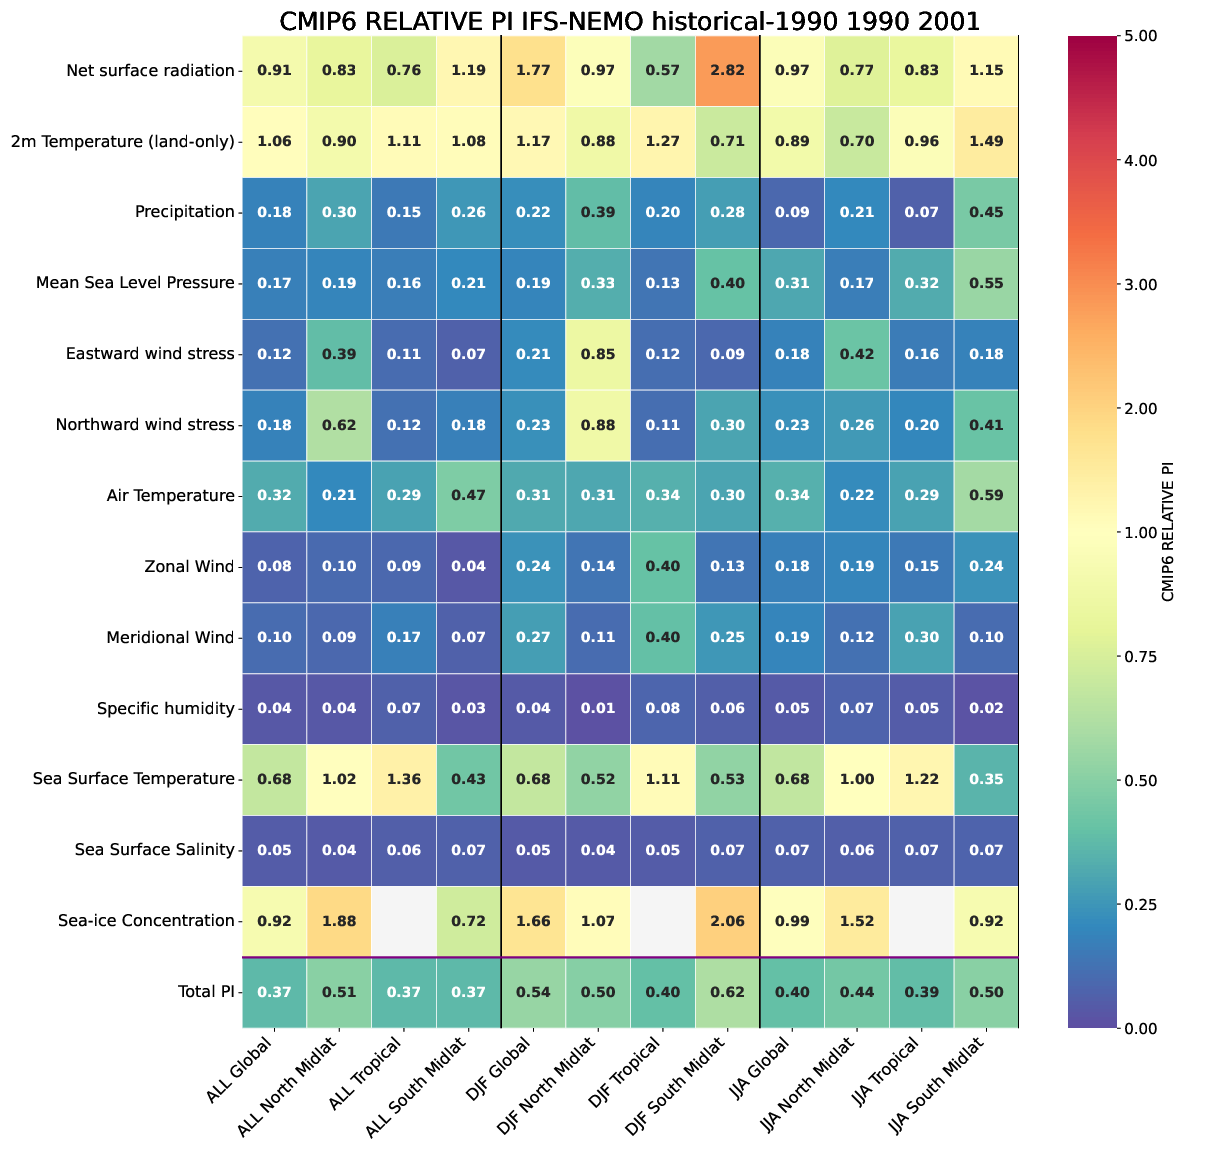

In [9]:
img_ifs

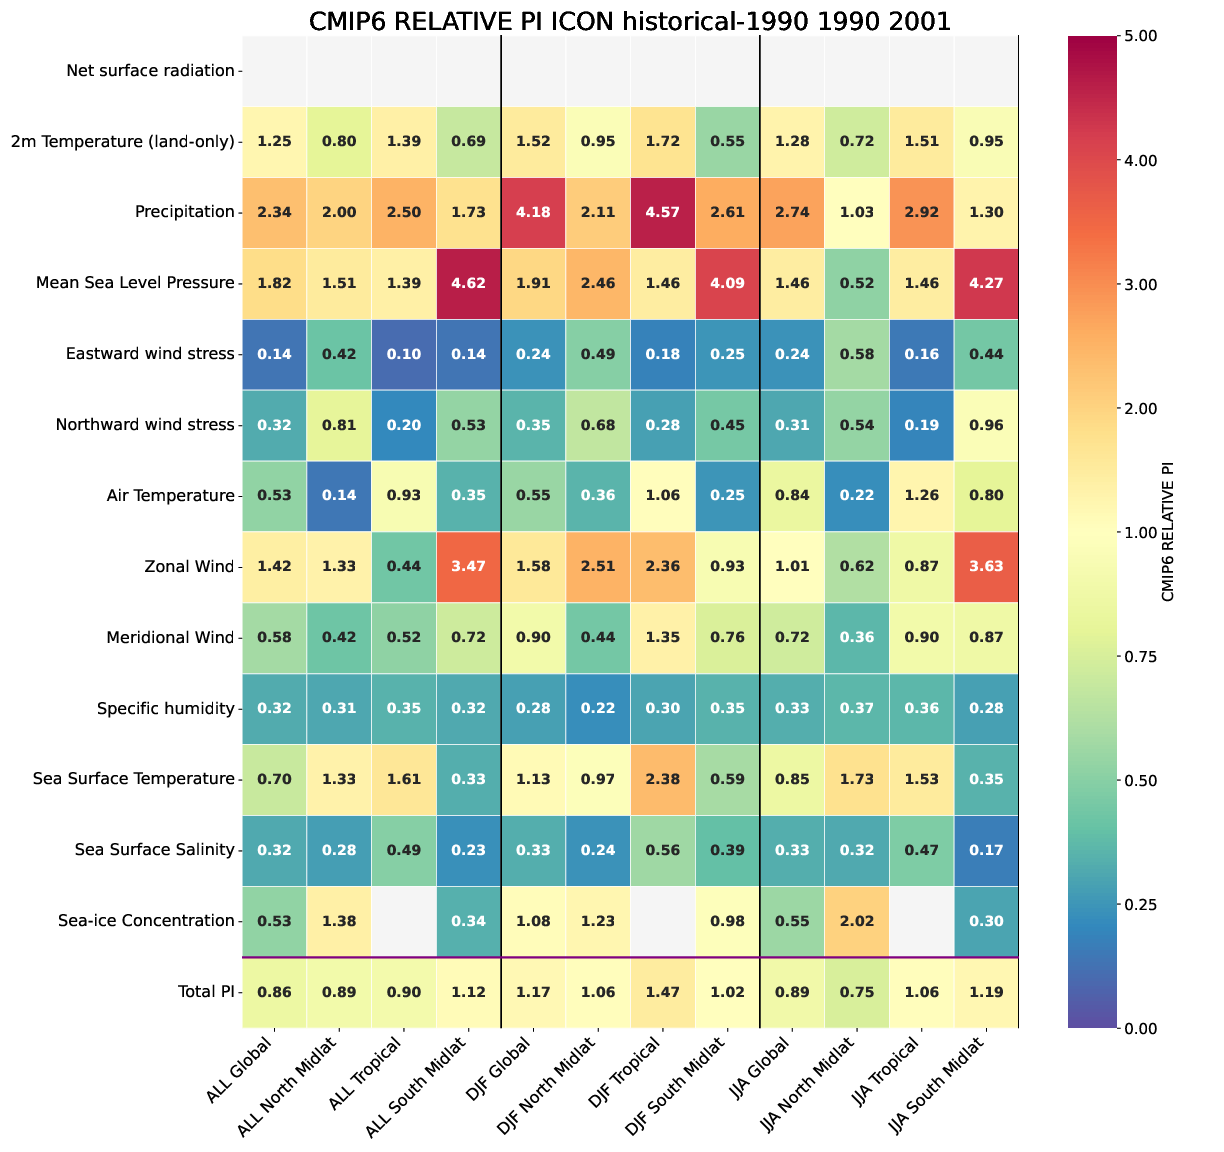

In [10]:
img_icon